In [1]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

from keras.callbacks import EarlyStopping
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as K

In [2]:
dataset = pd.read_csv("Datasets1/combined_report_Centar.csv")

In [3]:
dataset = dataset.drop(columns = ["ozone", "precipAccumulation", "precipIntensity", "precipProbability", "pressure", "visibility", "CO", "NO2", "O3", "PM25", "SO2", "CO2", "AQI"])

In [4]:
dataset_bez_stringovi = dataset.drop(columns = ["icon", "precipType", "summary"])

In [5]:
dataset_bez_stringovi

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM10
0,11.77,1.00,7.85,0.55,21.67,1420106400,0.0,30.0,8.69,8.69,20.6300
1,17.37,1.00,7.85,0.48,24.67,1420110000,0.0,30.0,6.14,6.14,19.4400
2,16.02,1.00,8.89,0.51,24.67,1420117200,0.0,30.0,7.85,7.85,22.5200
3,13.46,1.00,10.52,0.58,23.05,1420120800,0.0,30.0,8.69,8.69,24.3500
4,6.93,1.00,7.09,0.58,19.36,1420128000,0.0,29.0,11.92,11.92,31.1700
...,...,...,...,...,...,...,...,...,...,...,...
22690,39.42,0.00,26.34,0.51,43.46,1545908400,2.0,33.0,13.10,6.80,168.4090
22691,37.49,0.19,26.79,0.51,43.50,1545912000,1.0,30.0,14.51,11.28,59.2807
22692,36.95,0.19,26.94,0.52,43.42,1545915600,1.0,28.0,12.60,12.60,59.2807
22693,42.48,0.01,29.11,0.59,42.48,1545998400,1.0,122.0,5.51,0.00,153.1630


In [6]:
train_dataset = dataset_bez_stringovi[:-2000]

In [7]:
train_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM10
0,11.77,1.00,7.85,0.55,21.67,1420106400,0.0,30.0,8.69,8.69,20.6300
1,17.37,1.00,7.85,0.48,24.67,1420110000,0.0,30.0,6.14,6.14,19.4400
2,16.02,1.00,8.89,0.51,24.67,1420117200,0.0,30.0,7.85,7.85,22.5200
3,13.46,1.00,10.52,0.58,23.05,1420120800,0.0,30.0,8.69,8.69,24.3500
4,6.93,1.00,7.09,0.58,19.36,1420128000,0.0,29.0,11.92,11.92,31.1700
...,...,...,...,...,...,...,...,...,...,...,...
20690,73.20,0.44,59.00,0.61,73.20,1534363200,0.0,290.0,0.00,6.93,38.9980
20691,71.42,1.00,59.00,0.65,71.42,1534366800,0.0,330.0,0.00,4.69,35.5917
20692,73.20,1.00,59.00,0.61,73.20,1534370400,0.0,320.0,0.00,4.69,30.5536
20693,71.52,1.00,60.80,0.69,71.42,1534374000,0.0,320.0,0.00,4.69,28.2480


In [8]:
test_dataset = dataset_bez_stringovi[-2000:]

In [9]:
test_dataset

,apparentTemperature,cloudCover,dewPoint,humidity,temperature,time,uvIndex,windBearing,windGust,windSpeed,PM10
20695,69.96,0.75,62.59,0.78,69.62,1534381200,0.0,311.0,0.00,2.24,23.3042
20696,69.96,0.75,62.59,0.78,69.62,1534384800,0.0,311.0,0.00,2.24,24.5864
20697,68.21,0.75,62.59,0.83,67.81,1534388400,0.0,0.0,0.00,0.00,25.7348
20698,68.21,0.75,62.59,0.83,67.81,1534392000,0.0,200.0,0.00,2.24,26.0143
20699,71.73,0.75,62.59,0.74,71.42,1534395600,0.0,41.0,0.00,6.93,26.2159
...,...,...,...,...,...,...,...,...,...,...,...
22690,39.42,0.00,26.34,0.51,43.46,1545908400,2.0,33.0,13.10,6.80,168.4090
22691,37.49,0.19,26.79,0.51,43.50,1545912000,1.0,30.0,14.51,11.28,59.2807
22692,36.95,0.19,26.94,0.52,43.42,1545915600,1.0,28.0,12.60,12.60,59.2807
22693,42.48,0.01,29.11,0.59,42.48,1545998400,1.0,122.0,5.51,0.00,153.1630


In [32]:
train_features = train_dataset.drop(columns=['PM10'])
train_target = train_dataset['PM10']
train_features_values = train_features.values
train_target_values = train_target.values

In [51]:
scaler = MinMaxScaler() #default od 0 do 1
train_features_values = np.reshape(train_features_values, (20695,10))
train_features_values = scaler.fit_transform(train_features_values)

In [52]:
train_target_values.shape

(20695, 1)

In [61]:
scaler = MinMaxScaler() #default od 0 do 1
train_target_values = np.reshape(train_target_values, (20695,1))
inputs = scaler.fit_transform(test_data)

In [63]:
train_features_values = np.reshape(train_features_values, (20695, 10, 1))
inputs = np.reshape(inputs, (22000, 1, 1))

In [56]:
regressor1 = Sequential()
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(LSTM(50, return_sequences=True, input_shape = (None, 1)))
regressor1.add(Dropout(0.2))
regressor1.add(Dense(units = 1))

In [57]:
regressor1.compile(optimizer = 'adam', 
                  loss = 'mean_squared_error')

In [58]:
regressor1.fit(train_features_values, train_target_values, batch_size = 32, epochs = 50)

Epoch 1/50
647/647 [==============================] - 13s 11ms/step - loss: 2528.0906
Epoch 2/50
647/647 [==============================] - 7s 11ms/step - loss: 1867.5114
Epoch 3/50
647/647 [==============================] - 7s 11ms/step - loss: 1825.2848
Epoch 4/50
647/647 [==============================] - 7s 11ms/step - loss: 1823.4696
Epoch 5/50
647/647 [==============================] - 7s 11ms/step - loss: 1823.8695
Epoch 6/50
647/647 [==============================] - 7s 11ms/step - loss: 1824.6289
Epoch 7/50
647/647 [==============================] - 7s 11ms/step - loss: 1823.2518
Epoch 8/50
647/647 [==============================] - 7s 11ms/step - loss: 1824.7662
Epoch 9/50
647/647 [==============================] - 7s 11ms/step - loss: 1823.0868
Epoch 10/50
647/647 [==============================] - 7s 11ms/step - loss: 1824.2814
Epoch 11/50
647/647 [==============================] - 7s 11ms/step - loss: 1823.3944
Epoch 12/50
647/647 [==============================] - 7s 11ms

In [64]:
predicted = regressor1.predict(inputs)
predicted = predicted.reshape(22000,1)
predicted = scaler.inverse_transform(predicted)

In [65]:
rmse = math.sqrt(mean_squared_error(test_data, predicted))
print('Test Root Mean Squared Error:', rmse)
mae = mean_absolute_error(test_data, predicted)
print('Test Mean Absolute Error:', mae)

Test Root Mean Squared Error: 58840447284.57434
Test Mean Absolute Error: 58838784592.40428


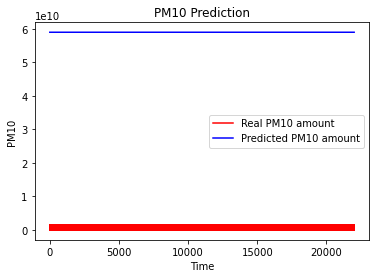

In [66]:
plt.figure()
plt.plot(test_data, color='red', label = 'Real PM10 amount')
plt.plot(predicted, color='blue', label = 'Predicted PM10 amount')
plt.title('PM10 Prediction')
plt.xlabel('Time')
plt.ylabel('PM10')
plt.legend()
plt.show()

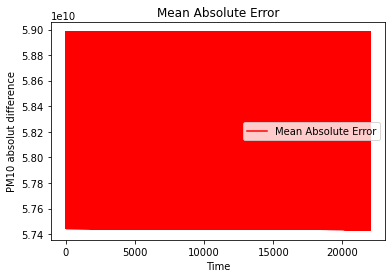

In [67]:
plt.figure()
plt.plot(np.abs(test_data - predicted), color='red', label = 'Mean Absolute Error')
plt.title('Mean Absolute Error')
plt.xlabel('Time')
plt.ylabel('PM10 absolut difference')
plt.legend()
plt.show()